In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sk_cluster
import sklearn.preprocessing as sk_preprocessing
import scipy.cluster.hierarchy as sc_clustering_hr


In [ ]:
def set_print_option():
    pass
set_print_option()

In [15]:
clients = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/customer_online_closing_store.csv')
clients["return_rate"] = clients["items_returned"] / clients["items_purchased"]
clients["average_price"] = clients["total_spent"] / clients["items_purchased"]

print(clients[["average_price", "return_rate", "overall_rating"]])

    average_price  return_rate  overall_rating
0      606.000000     1.000000               2
1     1191.600000     0.000000               5
2      687.692308     0.000000               5
3      574.333333     0.000000               5
4      516.400000     0.600000               2
5      819.454545     0.000000               5
6      572.200000     0.133333               5
7      563.750000     0.000000               5
8     1106.333333     0.666667               3
9      638.000000     0.000000               4
10     829.000000     0.600000               2
11    1197.238095     0.000000               4
12    1117.640000     0.000000               5
13     933.181818     0.000000               5
14     792.000000     0.062500               5
15     717.357143     0.000000               5
16     462.600000     0.200000               3
17     699.800000     0.200000               3
18     809.333333     0.666667               3
19     661.181818     0.000000               5
20     790.28

In [16]:
X = np.array(clients[["average_price", "return_rate", "overall_rating"]]).reshape(-1, 3)
min_max_scaler = sk_preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

print(X)

[[0.36127554 1.         0.        ]
 [0.92037426 0.         1.        ]
 [0.43927087 0.         1.        ]
 [0.33104195 0.         1.        ]
 [0.27573038 0.6        0.        ]
 [0.56507022 0.         1.        ]
 [0.32900516 0.13333333 1.        ]
 [0.32093756 0.         1.        ]
 [0.83896633 0.66666667 0.33333333]
 [0.39182738 0.         0.66666667]
 [0.57418369 0.6        0.        ]
 [0.9257572  0.         0.66666667]
 [0.84976131 0.         1.        ]
 [0.67365077 0.         1.        ]
 [0.53885812 0.0625     1.        ]
 [0.46759322 0.         1.        ]
 [0.22436509 0.2        0.33333333]
 [0.45083063 0.2        0.33333333]
 [0.55540704 0.66666667 0.33333333]
 [0.41396011 0.         1.        ]
 [0.53722142 0.         1.        ]
 [0.83411304 0.25       1.        ]
 [0.         0.05       1.        ]
 [0.38323468 0.25       0.33333333]
 [0.45484056 1.         0.        ]
 [0.0681688  0.         0.66666667]
 [0.64216154 0.         1.        ]
 [0.34313538 0.         0.66


       average_price  customer_id  overall_rating  return_rate
class                                                         
0         926.679248           26        4.923077     0.019012
1         664.593994           14        2.500000     0.327275
2         494.562827           14        4.500000     0.026993
3         778.777778            6        2.500000     0.888889


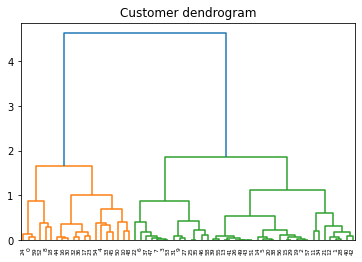

In [24]:
plt.title("Customer dendrogram")

linkage_method = "ward"
dendrogram = sc_clustering_hr.dendrogram(
    sc_clustering_hr.linkage(X, method=linkage_method))

agglomerative_model = sk_cluster.AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
agglomerative_model.fit(X)
clients["class"] = agglomerative_model.labels_
# print(clients)
print()

user_pivot_table = clients.pivot_table(
    index="class", 
    values=["average_price", "return_rate", "overall_rating", "customer_id"],
    aggfunc={"average_price":np.mean, "return_rate":np.mean, "overall_rating":np.mean, "customer_id":len})
print(user_pivot_table)

plt.show()